<a href="https://colab.research.google.com/github/Jenifer19IFC/AnaliseAjusteDados-ChuvasAustralia/blob/main/ChuvasAUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
import plotly.express as px
from scipy.stats import chi2_contingency

# **1. Dataset**: Chuvas na Austrália

**Descrição**: O conjunto de dados compreende cerca de 10 anos de observações meteorológicas diárias de vários locais da Austrália (de 01/11/2007 a 25/06/2017).

PS: ChoveAmanha está marcada como 'Sim'/1 se a chuva naquele dia foi de 1 mm ou mais.


**Fonte**: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

**N° de observações (linhas)**: 145460 linhas

**N° de variáveis**: 23 colunas.

**Objetivo**: Compreender o histórico das chuvas na Austrália entre 2007 e 2017 e identificar os principais fatores que influenciaram essa condição climática.

#### **Descrição das colunas**:

- Data: Data da observação - AAAA/MM/DD.
- Localizacao: Nome da estação meteorológica.
- TempMin: Temperatura mínima registrada durante o dia, em graus Celsius.
- TempMax: Temperatura máxima registrada durante o dia, em graus Celsius.
- Chuva: Quantidade de chuva registrada no dia, em milímetros.
- Evaporacao: Evaporação do tanque Classe A (em milímetros) nas 24 horas até às 9h.
- LuzSol: Número de horas de sol brilhante durante o dia.
- DirRajVentoMaisForte: Direção da rajada de vento mais forte nas 24 horas até meia-noite.
- VelocVentoMaisForte: Velocidade da rajada de vento mais forte nas 24 horas até meia-noite, em km/h.
- DirVento9h: Direção do vento às 9h.
- DirVento15: Direção do vento às 15h.
- VeloMediaVento9h: Velocidade média do vento (em km/h) calculada em 10 minutos antes das 9h.
- VeloMediaVento15h: Velocidade do vento (em km/h) média de 10 minutos antes das 15h.
- Umidade9h: Umidade (em porcentagem) às 9h.
- Umidade15h: Umidade (em porcentagem) às 15h.
- Pressao9h: Pressão atmosférica (em hPa) mínima ao nível médio do mar às 9h.
- Pressao15h: Pressão atmosférica (em hPa) mínima ao nível médio do mar às 15h.
- Nuvem9h: Fração do céu obscuro por nuvens às 9h, medida em "oktas".
- Nuvem15h: Fração do céu obscuro por nuvens às 15h, medida em "oktas".
- Temp9h: Temperatura às 9h, em graus Celsius.
- Temp15h: Temperatura às 15h, em graus Celsius.
- ChoveHoje: Booleano diminui se houve chuva hoje (1 para sim, 0 para não).
- ChuvaAmanha: Quantidade de chuva esperada para o dia seguinte, em milímetros.

In [ ]:
df = pd.read_csv('weatherAUS.csv')
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [ ]:
print(len(df))

145460


# **2. Ajuste de dados**

`**ANTES DE TUDO é importante realizar a renomeação das colunas conforme indicado em "2.2. Transformação de dados - Renomeação de colunas".**`

## **2.1. Limpeza de dados**

### Análise de duplicidade de dados

In [ ]:
duplicados = df[df.duplicated(keep=False)]
print(duplicados)

Empty DataFrame
Columns: [Data, Localizacao, TempMin, TempMax, Chuva, Evaporacao, LuzSol, DirRajVentoMaisForte, VelocVentoMaisForte, DirVento9h, DirVento15h, VeloMediaVento9h, VeloMediaVento15h, Umidade9h, Umidade15h, Pressao9h, Pressao15h, Nuvem9h, Nuvem15h, Temp9h, Temp15h, ChoveHoje, ChoveAmanha]
Index: []

[0 rows x 23 columns]


**Comentário**: Não há dados duplicados.

### Tratamento de valores numéricos nulos: preenchimento das colunas com a mediana da coluna

<Axes: >

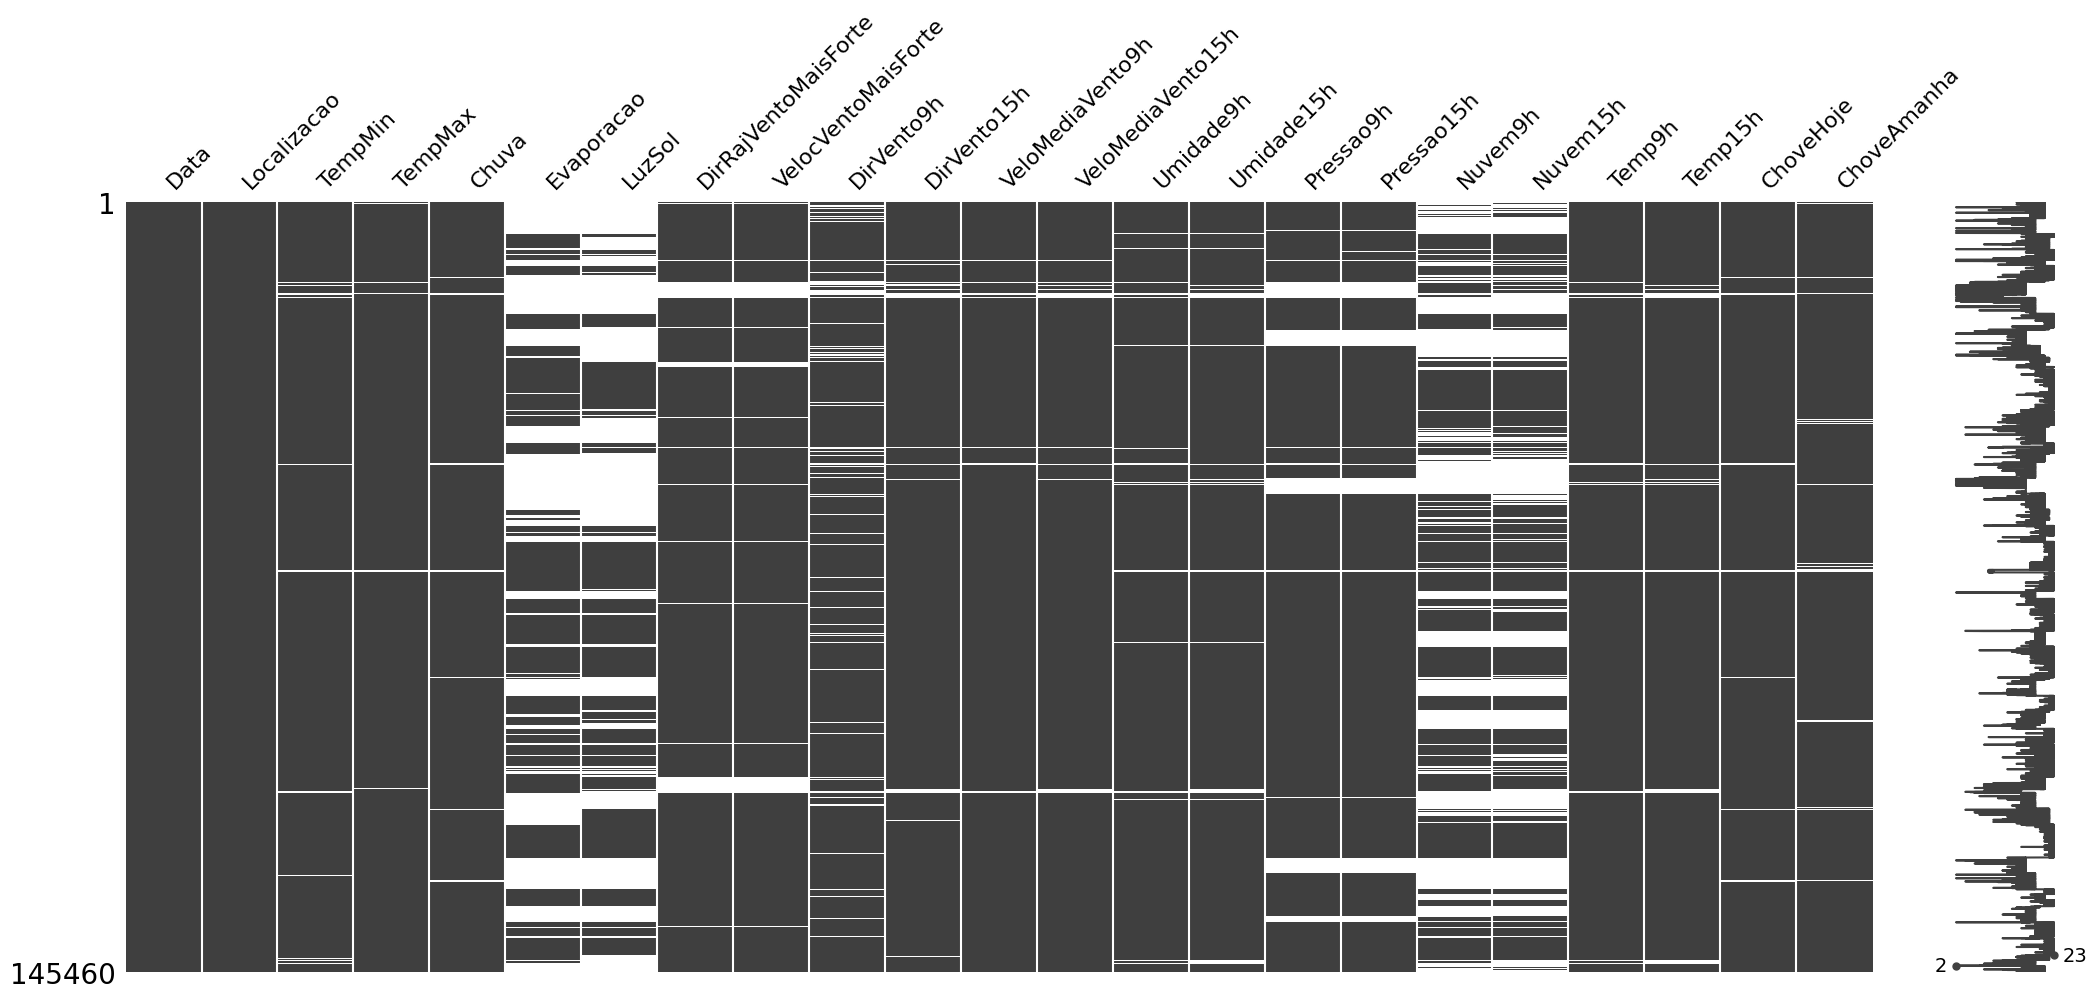

In [ ]:
mno.matrix(df) # Mostra presença/ausência de dados

**Comentário**: A exclusão de dados era inapropriada devido a grande concentração de dados nulos em 4 colunas.  

In [ ]:
# Seleciona apenas as colunas numéricas
col_num = ['TempMin', 'TempMax', 'Chuva', 'Evaporacao', 'LuzSol', 'VelocVentoMaisForte', 'VeloMediaVento9h', 'VeloMediaVento15h', 'Umidade9h', 'Umidade15h', 'Pressao9h', 'Pressao15h', 'Nuvem9h', 'Nuvem15h', 'Temp9h', 'Temp15h']

for column in col_num:
    df[column] = df[column].fillna(df[column].median())

print(df[col_num].head())

   TempMin  TempMax  Chuva  Evaporacao  LuzSol  VelocVentoMaisForte  \
0     13.4     22.9    0.6         4.8     8.4                 44.0   
1      7.4     25.1    0.0         4.8     8.4                 44.0   
2     12.9     25.7    0.0         4.8     8.4                 46.0   
3      9.2     28.0    0.0         4.8     8.4                 24.0   
4     17.5     32.3    1.0         4.8     8.4                 41.0   

   VeloMediaVento9h  VeloMediaVento15h  Umidade9h  Umidade15h  Pressao9h  \
0              20.0               24.0       71.0        22.0     1007.7   
1               4.0               22.0       44.0        25.0     1010.6   
2              19.0               26.0       38.0        30.0     1007.6   
3              11.0                9.0       45.0        16.0     1017.6   
4               7.0               20.0       82.0        33.0     1010.8   

   Pressao15h  Nuvem9h  Nuvem15h  Temp9h  Temp15h  
0      1007.1      8.0       5.0    16.9     21.8  
1      1007.

<Axes: >

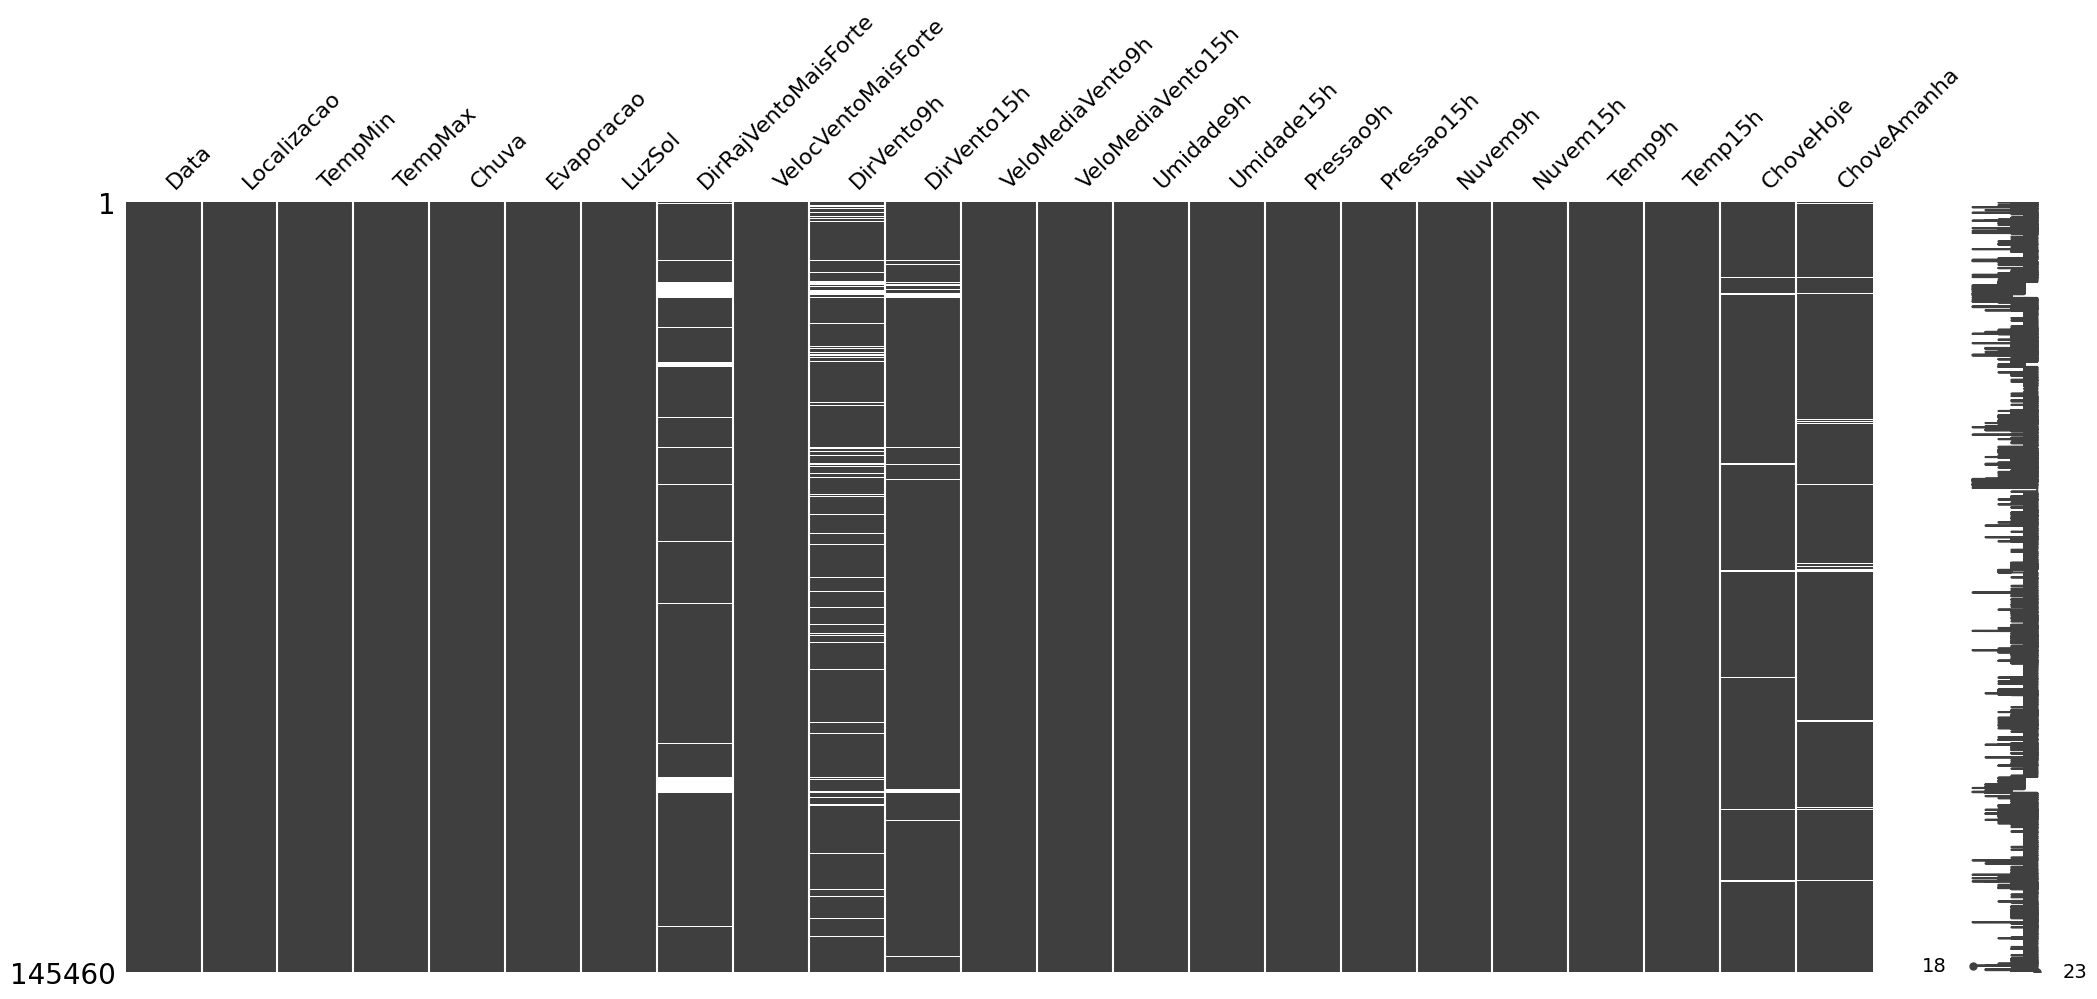

In [ ]:
mno.matrix(df) # Visualização após preenchimento

### Tratamento de valores nulos para as colunas ChoveHoje e ChoveAmanha: remoção de linhas

In [ ]:
df = df.dropna(subset=['ChoveHoje', 'ChoveAmanha'])

**Comentário**: Falta dessas informações pode atrapalhar a análise.

<Axes: >

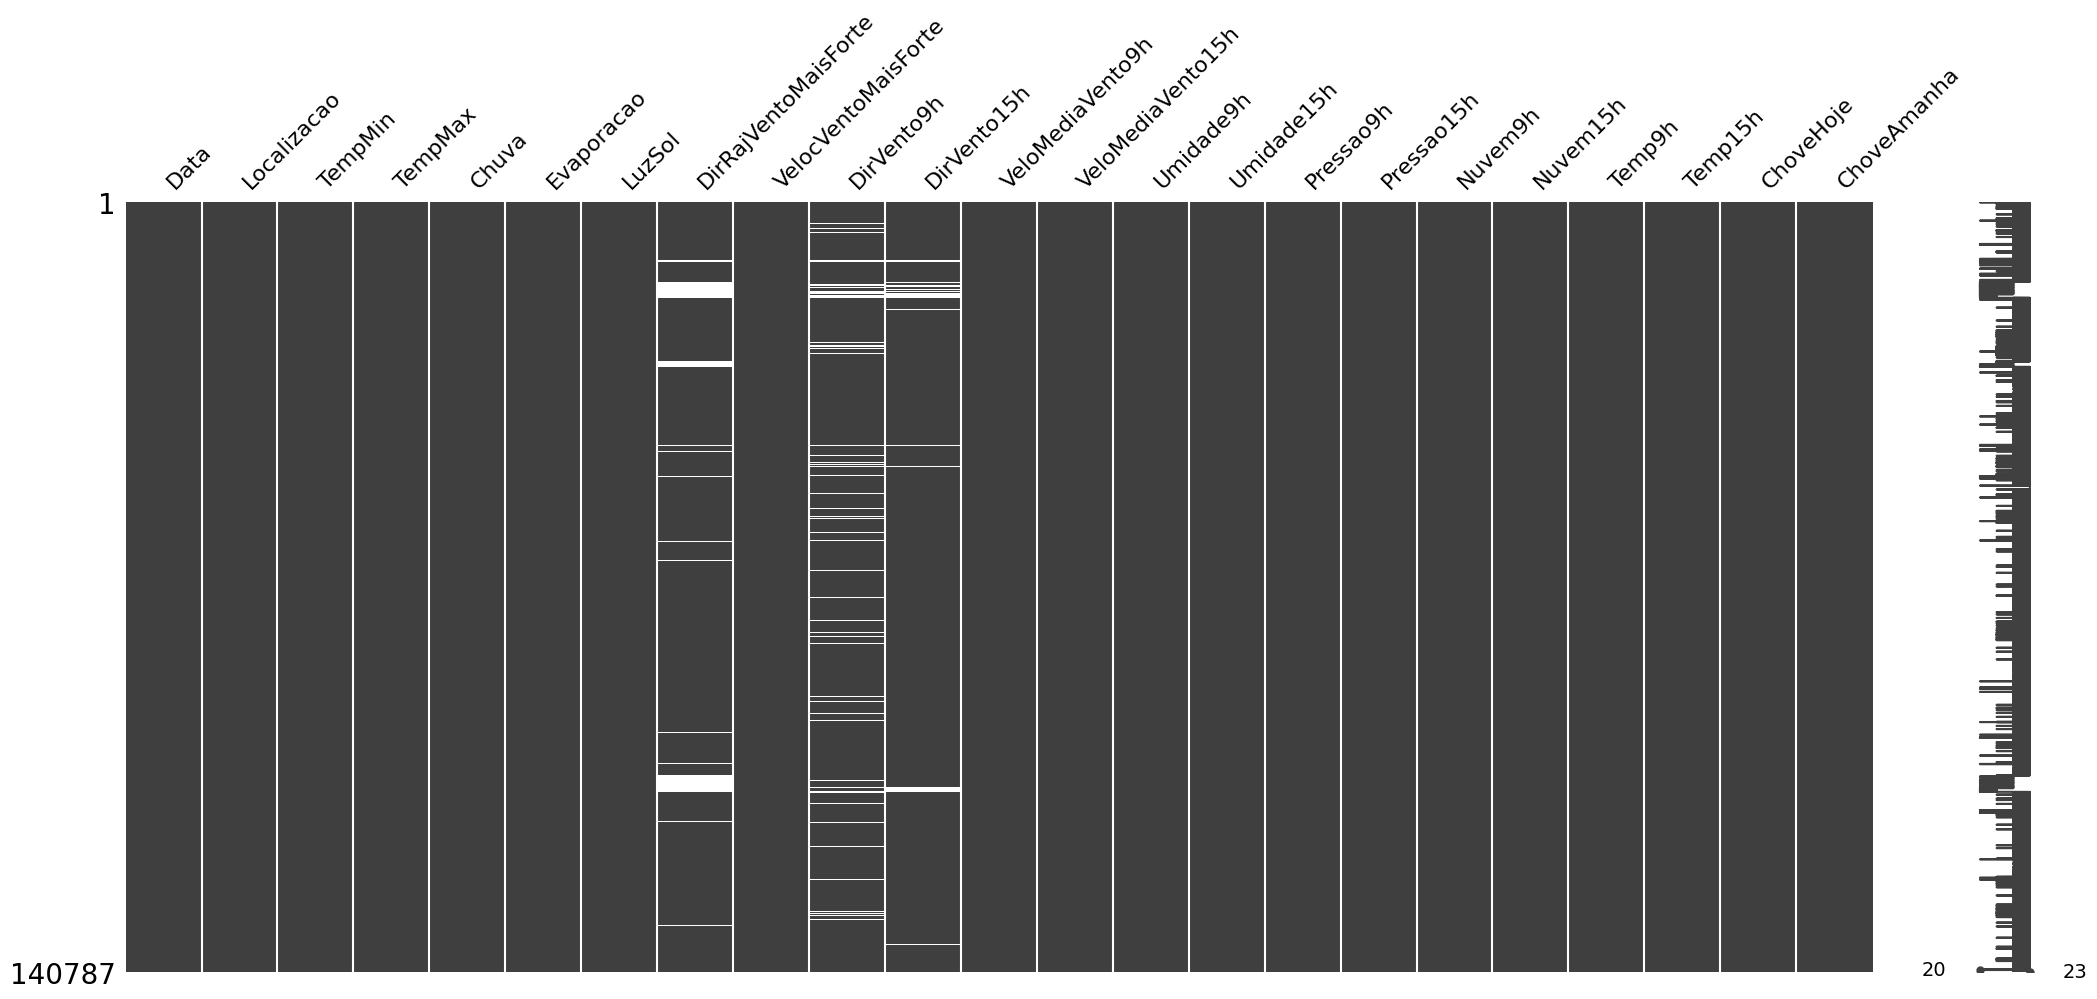

In [ ]:
mno.matrix(df) # Visualização após exclusão da linhas

### Tratamento de valores nulos para variáveis qualitativas (direções do vento): remoção de linhas

In [ ]:
df = df.dropna(subset=['DirRajVentoMaisForte', 'DirVento9h', 'DirVento15h'])

<Axes: >

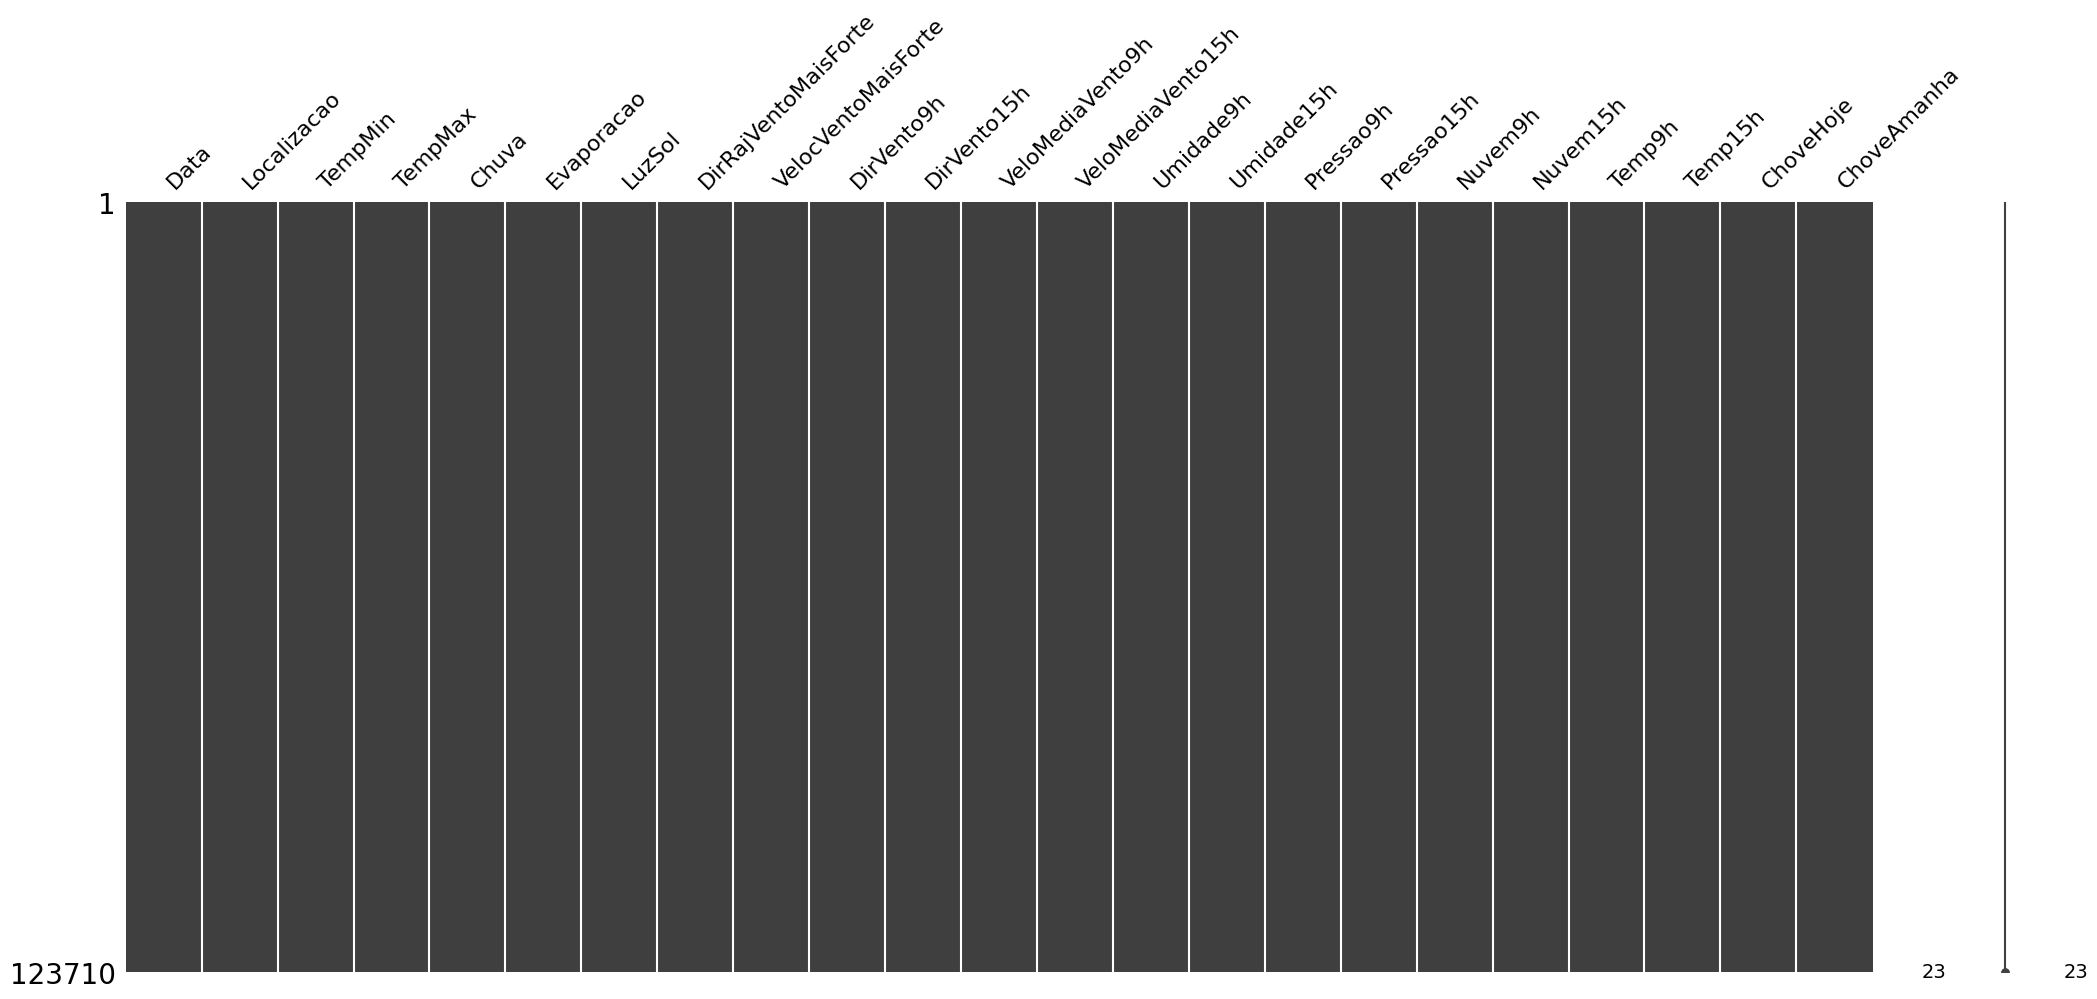

In [ ]:
mno.matrix(df) # Visualização após exclusão da linhas

**Comentário**: Foram removidas as linhas para estas colunas pois eram poucas as nulas.

### Verificando existência de outliers



In [ ]:
# Contando ocorrências de valores (trocar por cada coluna a ser analisada)
contagem = df['Chuva'].value_counts()
print(contagem)

Chuva
0.0      79552
0.2       7411
0.4       3289
0.6       2244
0.8       1762
         ...  
118.0        1
164.2        1
69.4         1
87.0         1
69.0         1
Name: count, Length: 647, dtype: int64


**Comentário**: Verificando se há alguma irregularidade na frequência de valores -> OK.

#### Boxplot de cada coluna para análise de outliers

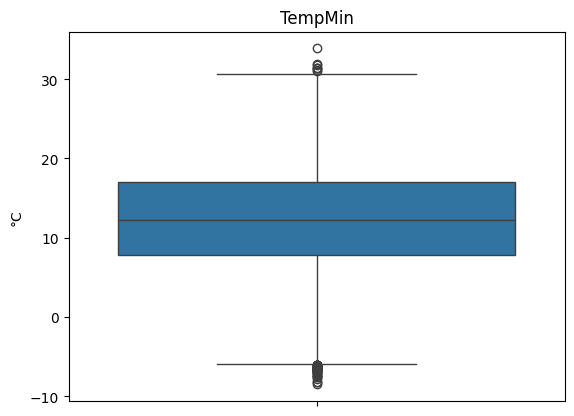

Máx:  33.9
Min:  -8.5


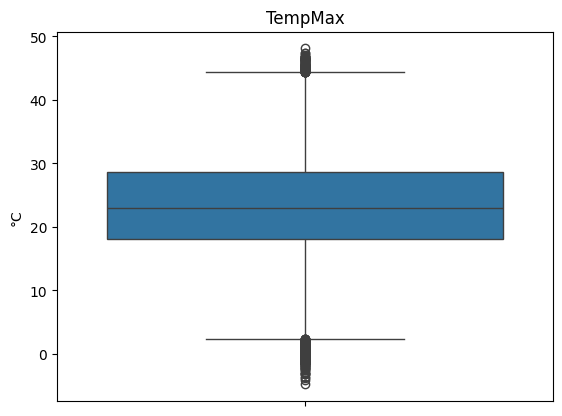

Máx:  33.9
Min:  -8.5


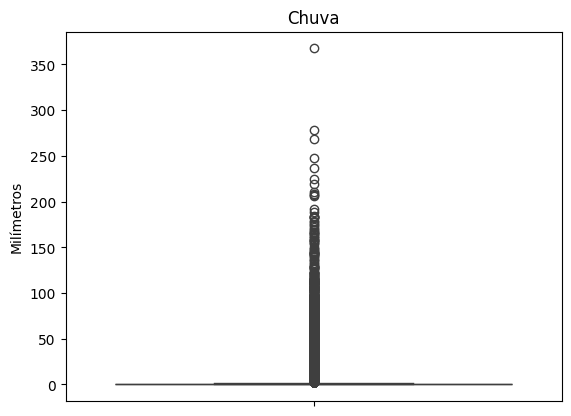

Máx:  367.6
Min:  0.0


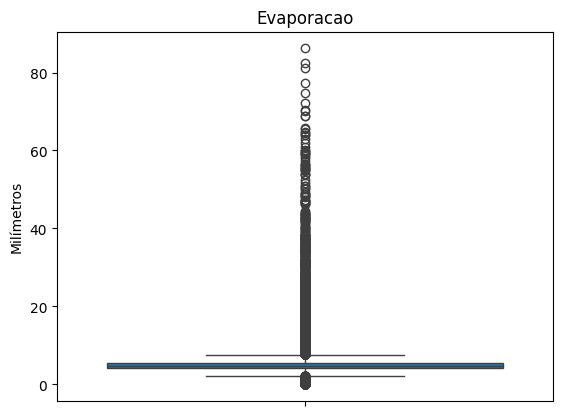

Máx:  86.2
Min:  0.0


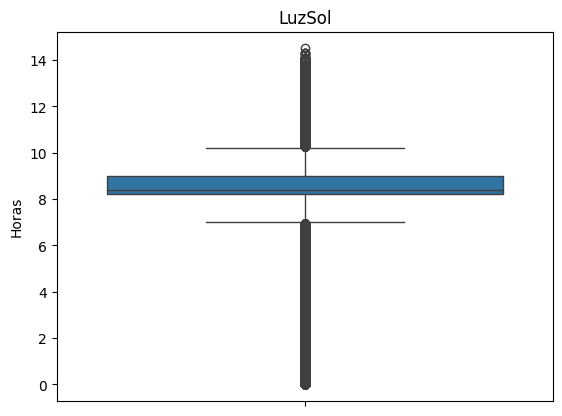

Máx:  14.5
Min:  0.0


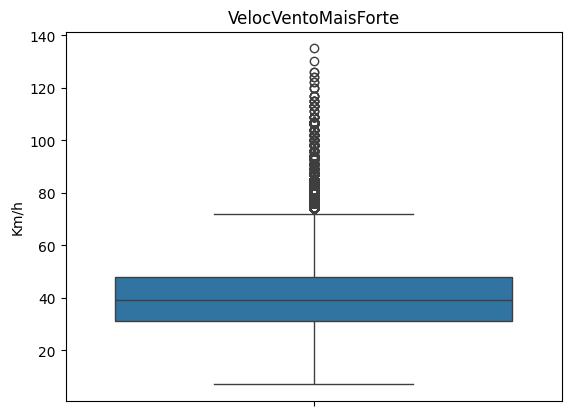

Máx:  135.0
Min:  7.0


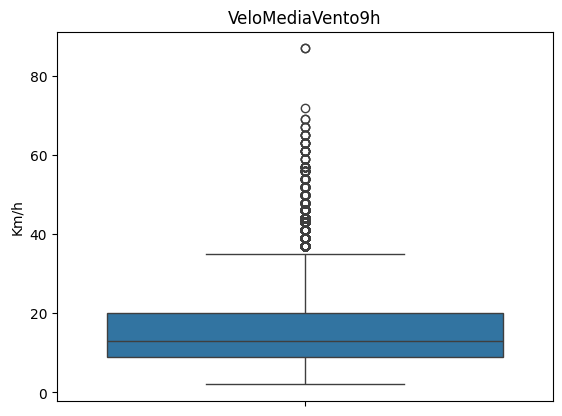

Máx:  87.0
Min:  2.0


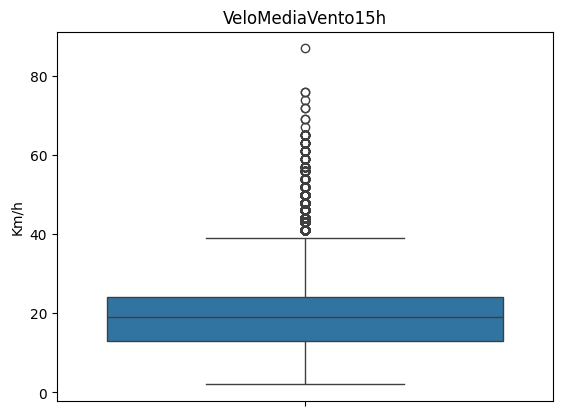

Máx:  87.0
Min:  2.0


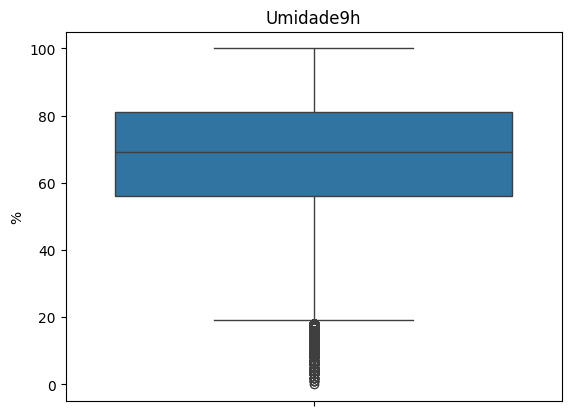

Máx:  100.0
Min:  0.0


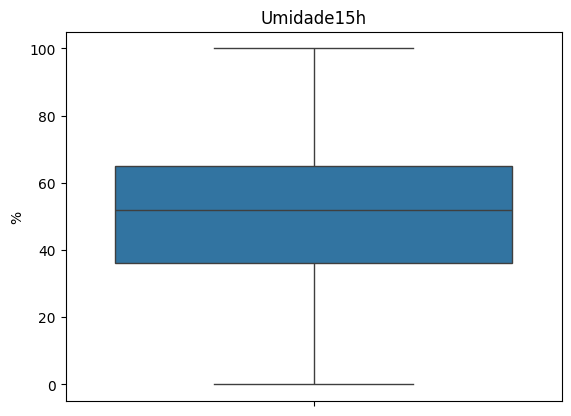

Máx:  100.0
Min:  0.0


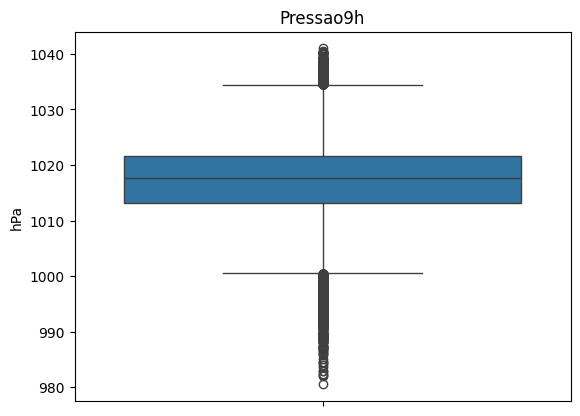

Máx:  1041.0
Min:  980.5


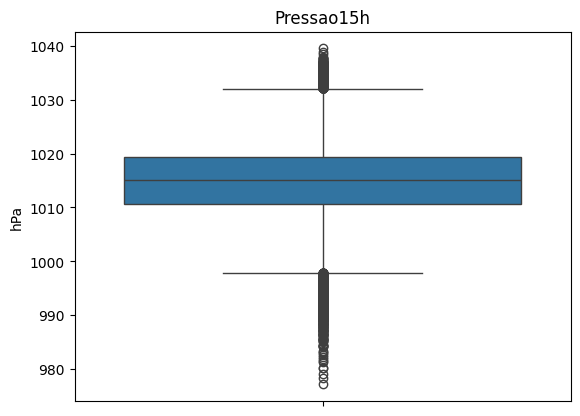

Máx:  1039.6
Min:  977.1


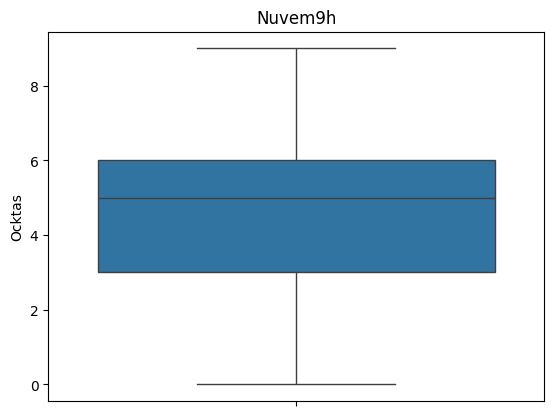

Máx:  9.0
Min:  0.0


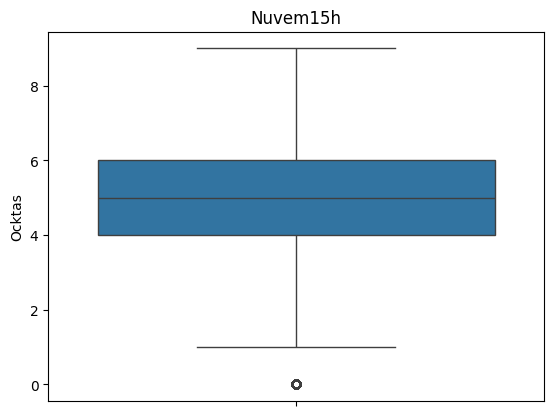

Máx:  9.0
Min:  0.0


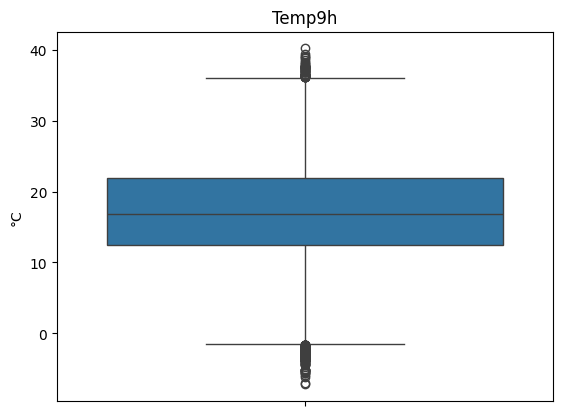

Máx:  40.2
Min:  -7.2


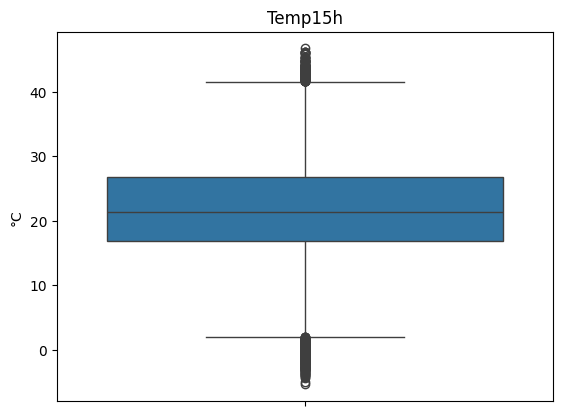

Máx:  46.7
Min:  -5.4


In [ ]:
# Boxplot
sns.boxplot(data=df['TempMin'])
plt.title('TempMin')
plt.ylabel('°C')
plt.show()

# Máximos e mínimos
print('Máx: ', df['TempMin'].max())
print('Min: ', df['TempMin'].min())
# -----------------------------------------------
# Boxplot
sns.boxplot(data=df['TempMax'])
plt.title('TempMax')
plt.ylabel('°C')
plt.show()

# Máximos e mínimos
print('Máx: ', df['TempMin'].max())
print('Min: ', df['TempMin'].min())
# -----------------------------------------------
# Boxplot
sns.boxplot(data=df['Chuva'])
plt.title('Chuva')
plt.ylabel('Milímetros')
plt.show()

# Máximos e mínimos
print('Máx: ', df['Chuva'].max())
print('Min: ', df['Chuva'].min())
# -----------------------------------------------
# Boxplot
sns.boxplot(data=df['Evaporacao'])
plt.title('Evaporacao')
plt.ylabel('Milímetros')
plt.show()

# Máximos e mínimos
print('Máx: ', df['Evaporacao'].max())
print('Min: ', df['Evaporacao'].min())
# -----------------------------------------------
# Boxplot
sns.boxplot(data=df['LuzSol'])
plt.title('LuzSol')
plt.ylabel('Horas')
plt.show()

# Máximos e mínimos
print('Máx: ', df['LuzSol'].max())
print('Min: ', df['LuzSol'].min())
# -----------------------------------------------
# Boxplot
sns.boxplot(data=df['VelocVentoMaisForte'])
plt.title('VelocVentoMaisForte')
plt.ylabel('Km/h')
plt.show()

# Máximos e mínimos
print('Máx: ', df['VelocVentoMaisForte'].max())
print('Min: ', df['VelocVentoMaisForte'].min())
# -----------------------------------------------
# Boxplot
sns.boxplot(data=df['VeloMediaVento9h'])
plt.title('VeloMediaVento9h')
plt.ylabel('Km/h')
plt.show()

# Máximos e mínimos
print('Máx: ', df['VeloMediaVento9h'].max())
print('Min: ', df['VeloMediaVento9h'].min())
# -----------------------------------------------
# Boxplot
sns.boxplot(data=df['VeloMediaVento15h'])
plt.title('VeloMediaVento15h')
plt.ylabel('Km/h')
plt.show()

# Máximos e mínimos
print('Máx: ', df['VeloMediaVento15h'].max())
print('Min: ', df['VeloMediaVento15h'].min())
# -----------------------------------------------
# Boxplot
sns.boxplot(data=df['Umidade9h'])
plt.title('Umidade9h')
plt.ylabel('%')
plt.show()

# Máximos e mínimos
print('Máx: ', df['Umidade9h'].max())
print('Min: ', df['Umidade9h'].min())
# -----------------------------------------------
# Boxplot
sns.boxplot(data=df['Umidade15h'])
plt.title('Umidade15h')
plt.ylabel('%')
plt.show()

# Máximos e mínimos
print('Máx: ', df['Umidade15h'].max())
print('Min: ', df['Umidade15h'].min())
# -----------------------------------------------
# Boxplot
sns.boxplot(data=df['Pressao9h'])
plt.title('Pressao9h')
plt.ylabel('hPa') # hectopascal
plt.show()

# Máximos e mínimos
print('Máx: ', df['Pressao9h'].max())
print('Min: ', df['Pressao9h'].min())
# -----------------------------------------------
# Boxplot
sns.boxplot(data=df['Pressao15h'])
plt.title('Pressao15h')
plt.ylabel('hPa') #hectopascal
plt.show()

# Máximos e mínimos
print('Máx: ', df['Pressao15h'].max())
print('Min: ', df['Pressao15h'].min())
# -----------------------------------------------
# Boxplot
sns.boxplot(data=df['Nuvem9h'])
plt.title('Nuvem9h')
plt.ylabel('Ocktas')
plt.show()

# Máximos e mínimos
print('Máx: ', df['Nuvem9h'].max())
print('Min: ', df['Nuvem9h'].min())
# -----------------------------------------------
# Boxplot
sns.boxplot(data=df['Nuvem15h'])
plt.title('Nuvem15h')
plt.ylabel('Ocktas')
plt.show()

# Máximos e mínimos
print('Máx: ', df['Nuvem15h'].max())
print('Min: ', df['Nuvem15h'].min())
# -----------------------------------------------
# Boxplot
sns.boxplot(data=df['Temp9h'])
plt.title('Temp9h')
plt.ylabel('°C')
plt.show()

# Máximos e mínimos
print('Máx: ', df['Temp9h'].max())
print('Min: ', df['Temp9h'].min())
# -----------------------------------------------
# Boxplot
sns.boxplot(data=df['Temp15h'])
plt.title('Temp15h')
plt.ylabel('°C')
plt.show()

# Máximos e mínimos
print('Máx: ', df['Temp15h'].max())
print('Min: ', df['Temp15h'].min())

**Comentário**: Para o cenário há grande quantidade de outliers. Porém, isso é justificado devido os dados serem reais e inconsistentes.

## **2.2. Transformação de dados**

### Renomeação das colunas

In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
df.rename(columns={'Date': 'Data', 'Location':'Localizacao', 'MinTemp':'TempMin', 'MaxTemp':'TempMax', 'Rainfall': 'Chuva', 'Evaporation':'Evaporacao', 'Sunshine':'LuzSol', 'WindGustDir':'DirRajVentoMaisForte', 'WindGustSpeed': 'VelocVentoMaisForte', 'WindDir9am':'DirVento9h', 'WindDir3pm':'DirVento15h', 'WindSpeed9am':'VeloMediaVento9h', 'WindSpeed3pm': 'VeloMediaVento15h', 'Humidity9am':'Umidade9h', 'Humidity3pm':'Umidade15h', 'Pressure9am':'Pressao9h', 'Pressure3pm': 'Pressao15h', 'Cloud9am':'Nuvem9h', 'Cloud3pm':'Nuvem15h', 'Temp9am':'Temp9h', 'Temp3pm': 'Temp15h', 'RainToday':'ChoveHoje', 'RainTomorrow':'ChoveAmanha'}, inplace=True)

In [ ]:
df.columns

Index(['Data', 'Localizacao', 'TempMin', 'TempMax', 'Chuva', 'Evaporacao',
       'LuzSol', 'DirRajVentoMaisForte', 'VelocVentoMaisForte', 'DirVento9h',
       'DirVento15h', 'VeloMediaVento9h', 'VeloMediaVento15h', 'Umidade9h',
       'Umidade15h', 'Pressao9h', 'Pressao15h', 'Nuvem9h', 'Nuvem15h',
       'Temp9h', 'Temp15h', 'ChoveHoje', 'ChoveAmanha'],
      dtype='object')

In [ ]:
df.head()

Data Localizacao  TempMin  TempMax  Chuva  Evaporacao  LuzSol  \
0  2008-12-01      Albury     13.4     22.9    0.6         NaN     NaN   
1  2008-12-02      Albury      7.4     25.1    0.0         NaN     NaN   
2  2008-12-03      Albury     12.9     25.7    0.0         NaN     NaN   
3  2008-12-04      Albury      9.2     28.0    0.0         NaN     NaN   
4  2008-12-05      Albury     17.5     32.3    1.0         NaN     NaN   

  DirRajVentoMaisForte  VelocVentoMaisForte DirVento9h  ... Umidade9h  \
0                    W                 44.0          W  ...      71.0   
1                  WNW                 44.0        NNW  ...      44.0   
2                  WSW                 46.0          W  ...      38.0   
3                   NE                 24.0         SE  ...      45.0   
4                    W                 41.0        ENE  ...      82.0   

   Umidade15h  Pressao9h  Pressao15h  Nuvem9h  Nuvem15h  Temp9h  Temp15h  \
0        22.0     1007.7      1007.1      8.0       NaN    16.9     21.8   
1        25.0     1010.6      1007.8      NaN       NaN    17.2     24.3   
2        30.0     1007.6      1008.7      NaN       2.0    21.0     23.2   
3        16.0     1017.6      1012.8      NaN       NaN    18.1     26.5   
4        33.0     1010.8      1006.0      7.0       8.0    17.8     29.7   

   ChoveHoje  ChoveAmanha  
0         No           No  
1         No           No  
2         No           No  
3         No           No  
4         No           No  

[5 rows x 23 columns]

### Para as colunas ChoveHoje e ChoveAmanha os valores 'No' e 'Yes' serão substituídos por 1 e 0. Isso para possibilitar a correlação de dados na etapa de análise.

In [ ]:
# Verifica valores únicos para as colunas
vlrs_choveHoje = df['ChoveHoje'].unique()
print(vlrs_choveHoje)
vlrs_choveAmanha = df['ChoveAmanha'].unique()
print(vlrs_choveAmanha)

['No' 'Yes']
['No' 'Yes']


In [ ]:
# Transforma texto em numérico
df['ChoveHoje'] = df['ChoveHoje'].replace({'Yes': 1, 'No': 0})
df['ChoveAmanha'] = df['ChoveAmanha'].replace({'Yes': 1, 'No': 0})

In [ ]:
# Verifica alterações
print(df[['ChoveHoje', 'ChoveAmanha']])

        ChoveHoje  ChoveAmanha
0               0            0
1               0            0
2               0            0
3               0            0
4               0            0
...           ...          ...
145454          0            0
145455          0            0
145456          0            0
145457          0            0
145458          0            0

[123710 rows x 2 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123710 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Data                  123710 non-null  object 
 1   Localizacao           123710 non-null  object 
 2   TempMin               123710 non-null  float64
 3   TempMax               123710 non-null  float64
 4   Chuva                 123710 non-null  float64
 5   Evaporacao            123710 non-null  float64
 6   LuzSol                123710 non-null  float64
 7   DirRajVentoMaisForte  123710 non-null  object 
 8   VelocVentoMaisForte   123710 non-null  float64
 9   DirVento9h            123710 non-null  object 
 10  DirVento15h           123710 non-null  object 
 11  VeloMediaVento9h      123710 non-null  float64
 12  VeloMediaVento15h     123710 non-null  float64
 13  Umidade9h             123710 non-null  float64
 14  Umidade15h            123710 non-null  float64
 15  Press

### Conversão do tipo da coluna Data para Datetime

In [ ]:
df['Data'] = pd.to_datetime(df['Data'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123710 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Data                  123710 non-null  datetime64[ns]
 1   Localizacao           123710 non-null  object        
 2   TempMin               123710 non-null  float64       
 3   TempMax               123710 non-null  float64       
 4   Chuva                 123710 non-null  float64       
 5   Evaporacao            123710 non-null  float64       
 6   LuzSol                123710 non-null  float64       
 7   DirRajVentoMaisForte  123710 non-null  object        
 8   VelocVentoMaisForte   123710 non-null  float64       
 9   DirVento9h            123710 non-null  object        
 10  DirVento15h           123710 non-null  object        
 11  VeloMediaVento9h      123710 non-null  float64       
 12  VeloMediaVento15h     123710 non-null  float64       
 13  Umid

### Tradução e substituição das direções

In [ ]:
sorted(df['DirVento9h'].unique()) # Substituir por outros DirRajVentoMaisForte/DirVento15h

['E',
 'ENE',
 'ESE',
 'N',
 'NE',
 'NNE',
 'NNW',
 'NW',
 'S',
 'SE',
 'SSE',
 'SSW',
 'SW',
 'W',
 'WNW',
 'WSW']

In [ ]:
traducao_direcoes = {
    'N': 'Norte',
    'NE': 'Nordeste',
    'ENE': 'LesteNordeste',
    'E': 'Leste',
    'ESE': 'LesteSudeste',
    'SE': 'Sudeste',
    'SSE': 'SudesteSul',
    'SSW': 'SudoesteSul',
    'SW': 'Sudoeste',
    'WNW': 'OesteNoroeste',
    'WSW': 'OesteSudoeste',
    'W': 'Oeste',
    'NW': 'Noroeste',
    'NNW': 'NorteNoroeste',
    'S':'Sul',
    'NNE':'NorNordeste'
}
df['DirVento9h'] = df['DirVento9h'].replace(traducao_direcoes)
df['DirVento15h'] = df['DirVento15h'].replace(traducao_direcoes)
df['DirRajVentoMaisForte'] = df['DirRajVentoMaisForte'].replace(traducao_direcoes)

**Comentário**: Alterado para melhor compreensão dos dados.

In [ ]:
df.head()

Data Localizacao  TempMin  TempMax  Chuva  Evaporacao  LuzSol  \
0 2008-12-01      Albury     13.4     22.9    0.6         4.8     8.4   
1 2008-12-02      Albury      7.4     25.1    0.0         4.8     8.4   
2 2008-12-03      Albury     12.9     25.7    0.0         4.8     8.4   
3 2008-12-04      Albury      9.2     28.0    0.0         4.8     8.4   
4 2008-12-05      Albury     17.5     32.3    1.0         4.8     8.4   

  DirRajVentoMaisForte  VelocVentoMaisForte     DirVento9h  ... Umidade9h  \
0                Oeste                 44.0          Oeste  ...      71.0   
1        OesteNoroeste                 44.0  NorteNoroeste  ...      44.0   
2        OesteSudoeste                 46.0          Oeste  ...      38.0   
3             Nordeste                 24.0        Sudeste  ...      45.0   
4                Oeste                 41.0  LesteNordeste  ...      82.0   

   Umidade15h  Pressao9h  Pressao15h  Nuvem9h  Nuvem15h  Temp9h  Temp15h  \
0        22.0     1007.7      1007.1      8.0       5.0    16.9     21.8   
1        25.0     1010.6      1007.8      5.0       5.0    17.2     24.3   
2        30.0     1007.6      1008.7      5.0       2.0    21.0     23.2   
3        16.0     1017.6      1012.8      5.0       5.0    18.1     26.5   
4        33.0     1010.8      1006.0      7.0       8.0    17.8     29.7   

   ChoveHoje  ChoveAmanha  
0          0            0  
1          0            0  
2          0            0  
3          0            0  
4          0            0  

[5 rows x 23 columns]

In [ ]:
df.DirVento9h.unique() # Substituir também por DirRajVentoMaisForte/DirVento15h

array(['Oeste', 'NorteNoroeste', 'Sudeste', 'LesteNordeste', 'Sudoeste',
       'SudesteSul', 'Sul', 'Nordeste', 'SudoesteSul', 'Norte',
       'OesteSudoeste', 'LesteSudeste', 'Leste', 'Noroeste',
       'OesteNoroeste', 'NorNordeste'], dtype=object)

In [ ]:
duplicados = df[df.duplicated(keep=False)]
print(duplicados)

Empty DataFrame
Columns: [Data, Localizacao, TempMin, TempMax, Chuva, Evaporacao, LuzSol, DirRajVentoMaisForte, VelocVentoMaisForte, DirVento9h, DirVento15h, VeloMediaVento9h, VeloMediaVento15h, Umidade9h, Umidade15h, Pressao9h, Pressao15h, Nuvem9h, Nuvem15h, Temp9h, Temp15h, ChoveHoje, ChoveAmanha]
Index: []

[0 rows x 23 columns]


**Comentário**: Após toda a limpeza e tratamento verificando se há dados duplicados.

# **3. Análise Exploratória**

### Resumo estatístico

#### Estatíticas descritivas das variáveis numéricas

In [ ]:
df.describe()

Data        TempMin        TempMax  \
count                         123710  123710.000000  123710.000000   
mean   2013-04-19 03:45:49.106781952      12.413776      23.474582   
min              2007-11-01 00:00:00      -8.500000      -4.800000   
25%              2011-01-31 00:00:00       7.800000      18.100000   
50%              2013-06-20 00:00:00      12.200000      23.000000   
75%              2015-06-29 00:00:00      17.000000      28.600000   
max              2017-06-25 00:00:00      33.900000      48.100000   
std                              NaN       6.366799       7.205915   

               Chuva     Evaporacao         LuzSol  VelocVentoMaisForte  \
count  123710.000000  123710.000000  123710.000000        123710.000000   
mean        2.375661       5.278091       8.030365            40.685280   
min         0.000000       0.000000       0.000000             7.000000   
25%         0.000000       4.200000       8.200000            31.000000   
50%         0.000000       4.800000       8.400000            39.000000   
75%         0.800000       5.600000       9.000000            48.000000   
max       367.600000      86.200000      14.500000           135.000000   
std         8.528039       3.269193       2.802409            13.388636   

       VeloMediaVento9h  VeloMediaVento15h      Umidade9h     Umidade15h  \
count     123710.000000      123710.000000  123710.000000  123710.000000   
mean          15.011689          19.174578      67.673470      50.862574   
min            2.000000           2.000000       0.000000       0.000000   
25%            9.000000          13.000000      56.000000      36.000000   
50%           13.000000          19.000000      69.000000      52.000000   
75%           20.000000          24.000000      81.000000      65.000000   
max           87.000000          87.000000     100.000000     100.000000   
std            8.307285           8.571039      18.976358      20.839815   

           Pressao9h     Pressao15h        Nuvem9h       Nuvem15h  \
count  123710.000000  123710.000000  123710.000000  123710.000000   
mean     1017.413025    1015.025408       4.628874       4.689702   
min       980.500000     977.100000       0.000000       0.000000   
25%      1013.200000    1010.700000       3.000000       4.000000   
50%      1017.600000    1015.200000       5.000000       5.000000   
75%      1021.700000    1019.300000       6.000000       6.000000   
max      1041.000000    1039.600000       9.000000       9.000000   
std         6.765576       6.703695       2.298830       2.139233   

              Temp9h        Temp15h      ChoveHoje    ChoveAmanha  
count  123710.000000  123710.000000  123710.000000  123710.000000  
mean       17.268054      21.891956       0.224363       0.221421  
min        -7.200000      -5.400000       0.000000       0.000000  
25%        12.500000      16.800000       0.000000       0.000000  
50%        16.900000      21.300000       0.000000       0.000000  
75%        21.900000      26.700000       0.000000       0.000000  
max        40.200000      46.700000       1.000000       1.000000  
std         6.477935       7.006134       0.417164       0.415205

#### Distribuição de frequência de variáveis categóricas

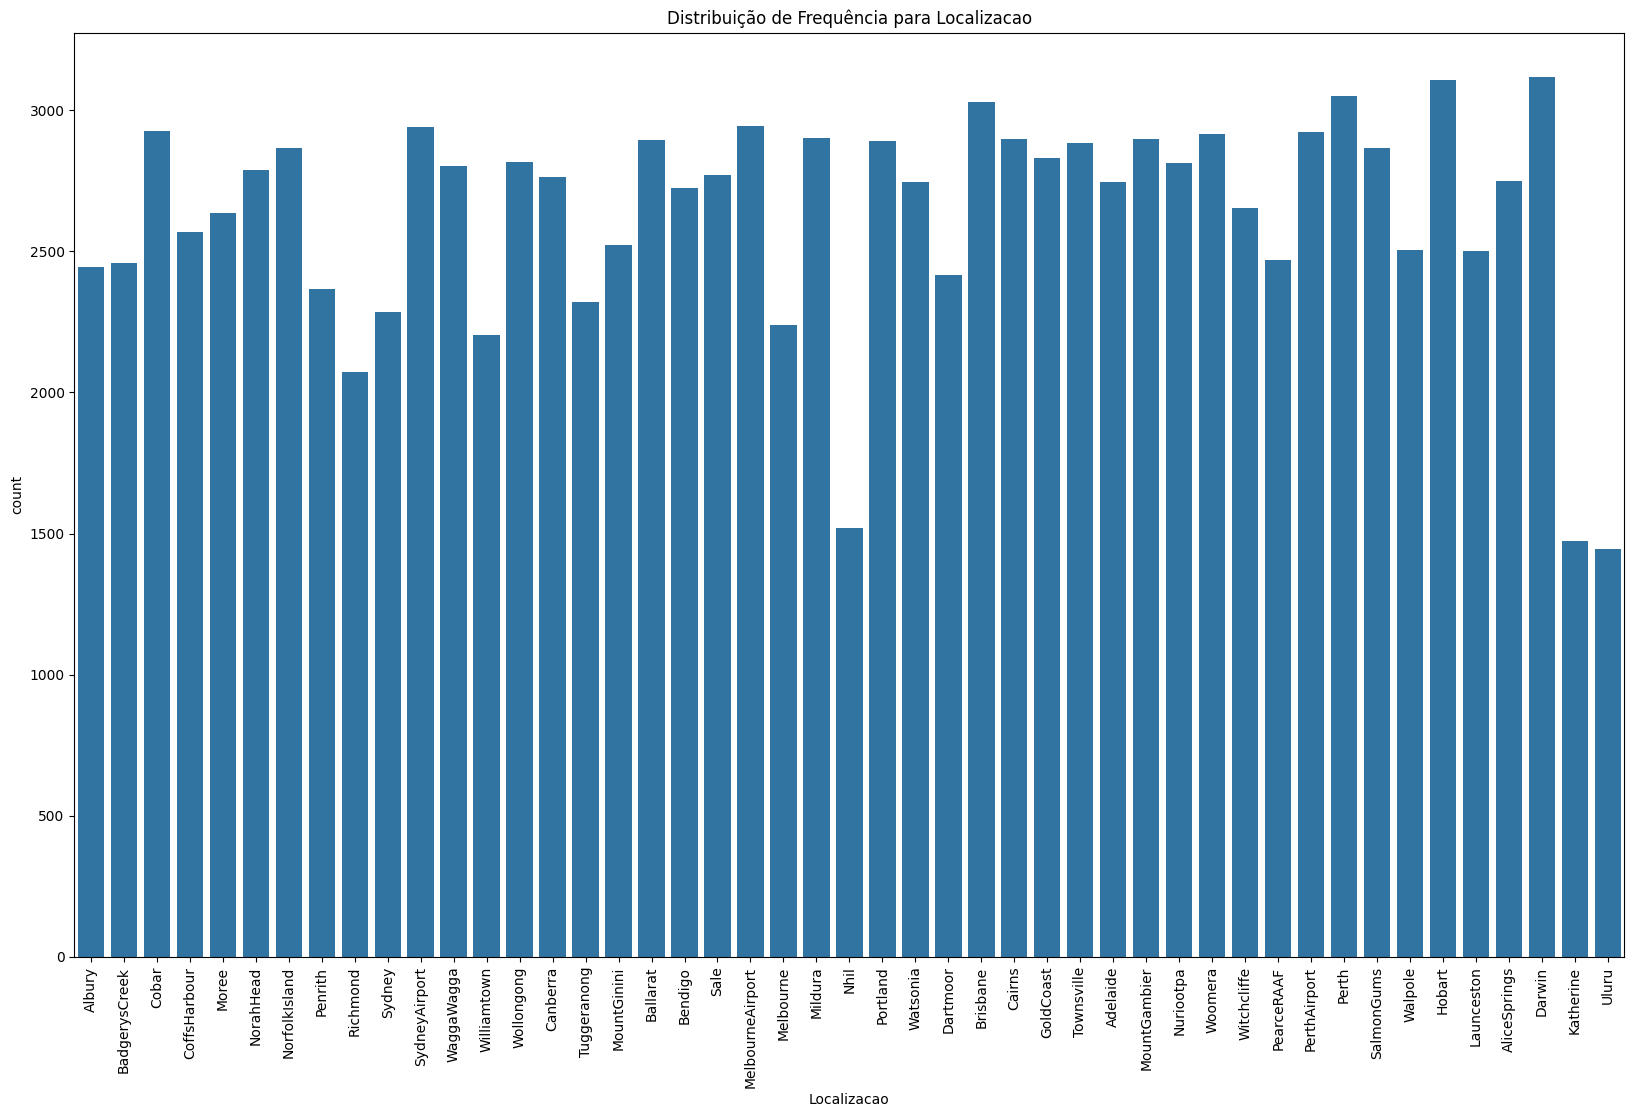

In [ ]:
# Localização
plt.figure(figsize=(20, 12))
sns.countplot(x='Localizacao', data=df)
plt.title('Distribuição de Frequência para Localizacao')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['Localizacao'].value_counts().sort_values(ascending=True)

Localizacao
Uluru               1446
Katherine           1473
Nhil                1518
Richmond            2073
Williamtown         2203
Melbourne           2240
Sydney              2285
Tuggeranong         2322
Penrith             2366
Dartmoor            2418
Albury              2445
BadgerysCreek       2458
PearceRAAF          2469
Launceston          2503
Walpole             2506
MountGinini         2524
CoffsHarbour        2568
Moree               2635
Witchcliffe         2653
Bendigo             2725
Watsonia            2745
Adelaide            2746
AliceSprings        2748
Canberra            2762
Sale                2771
NorahHead           2790
WaggaWagga          2801
Nuriootpa           2812
Wollongong          2817
GoldCoast           2832
SalmonGums          2865
NorfolkIsland       2868
Townsville          2884
Portland            2890
Ballarat            2895
MountGambier        2898
Cairns              2900
Mildura             2903
Woomera             2917
PerthAirport 

**Comentário**: Urulu, Katherine e Nhil são as cidades com menos registros de dados.

Darwin, Hobart e Perth são as cidades com mais registros de dados.

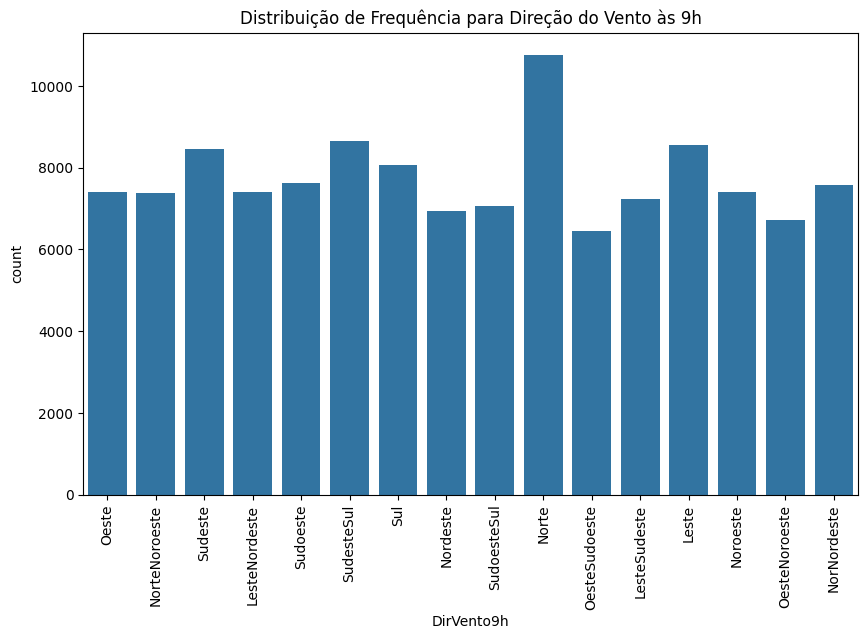

In [ ]:
# Direção do Vento às 9h
plt.figure(figsize=(10, 6))
sns.countplot(x='DirVento9h', data=df)
plt.title('Distribuição de Frequência para Direção do Vento às 9h')
plt.xticks(rotation=90)
plt.show()

**Comentário**: Às 9 horas, na maioria das vezes a direção do vento é Norte.

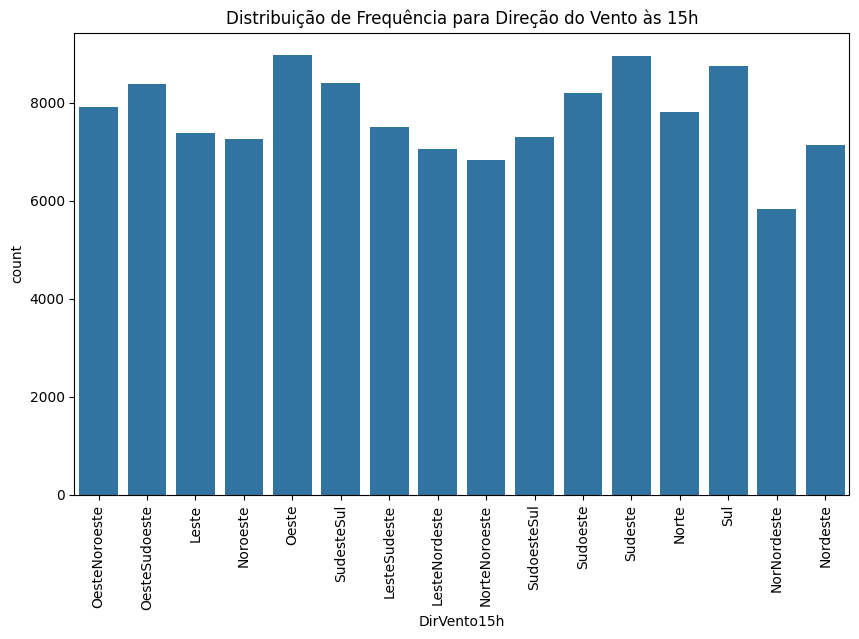

In [ ]:
# Direção do Vento às 15h
plt.figure(figsize=(10, 6))
sns.countplot(x='DirVento15h', data=df)
plt.title('Distribuição de Frequência para Direção do Vento às 15h')
plt.xticks(rotation=90)
plt.show()

**Comentário**: Às 15 horas, na maioria das vezes as direções do vento são Oeste e Sudeste.

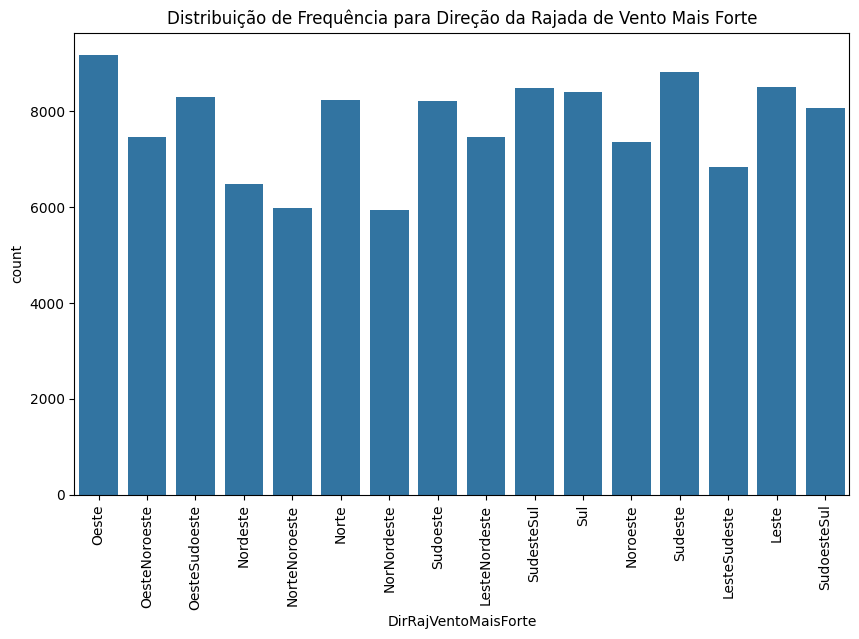

In [ ]:
# Direção da Rajada de Vento Mais Forte
plt.figure(figsize=(10, 6))
sns.countplot(x='DirRajVentoMaisForte', data=df)
plt.title('Distribuição de Frequência para Direção da Rajada de Vento Mais Forte')
plt.xticks(rotation=90)
plt.show()

**Comentário**: As rajadas de vento mais fortes são das direções Oeste e Sudeste da Austrália.


### Histogramas de todas as colunas

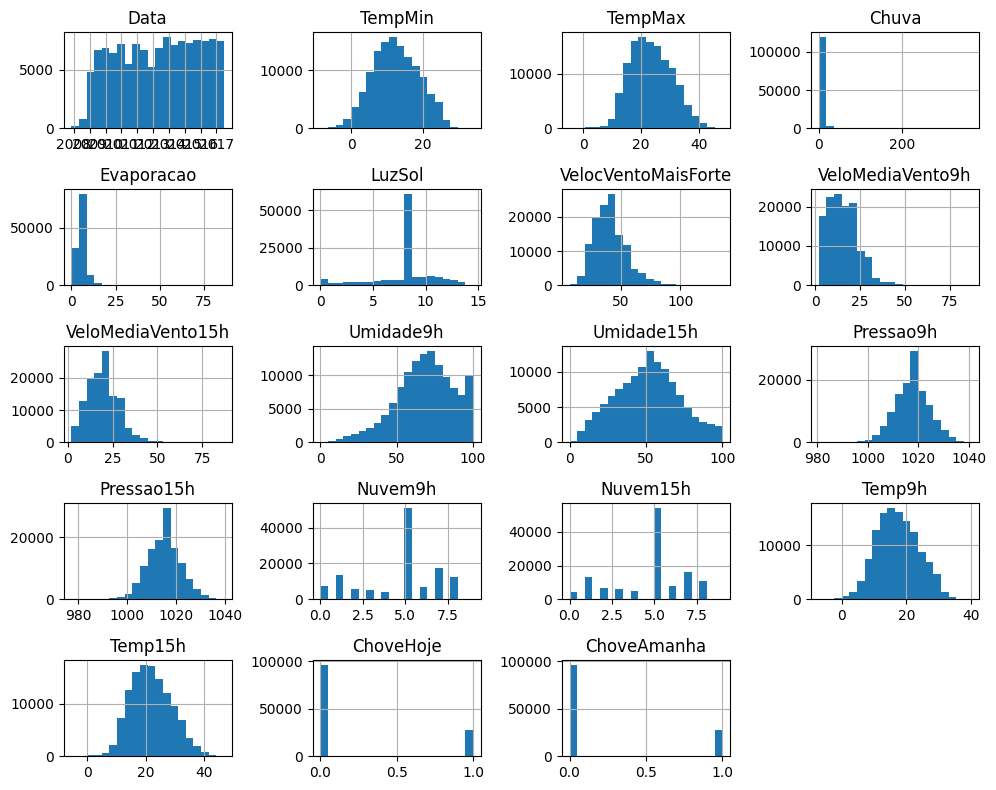

In [ ]:
df.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()
# x -> Valores da coluna
# y -> frequência

**Comentário**: Temperatura mínina é máxima, temperatura às 9h e 15h teêm uma distribuição normal. O restante tem uma distribuição assimétrica (positiva ou negativa) ou multimodal(com picos).

### Histograma de chuva ao longo dos anos

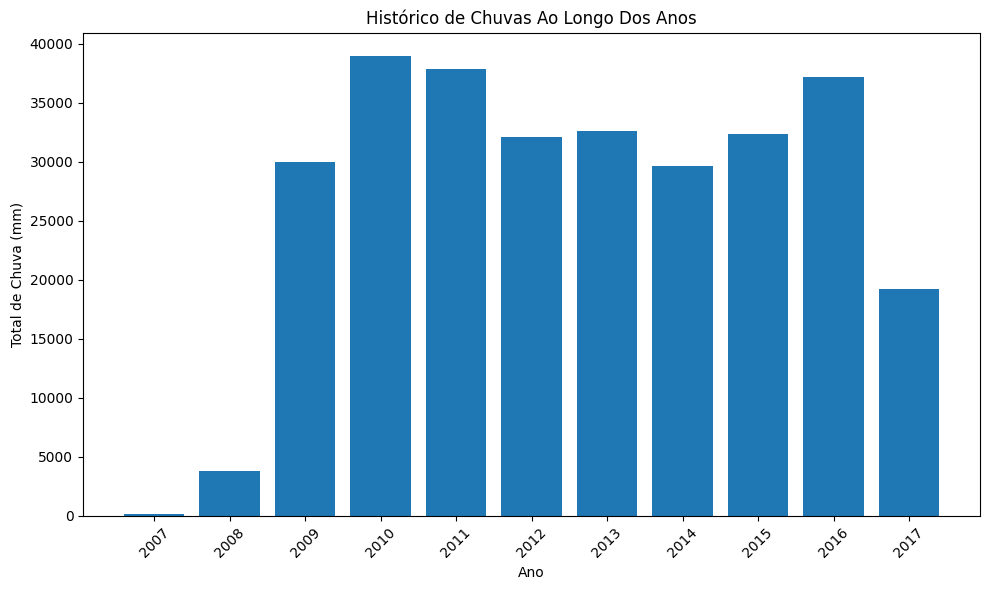

In [ ]:
# Filtrando apenas a coluna 'Chuva'
chuva = df[['Data', 'Chuva']].copy()

# Agrupamento por ano e somatório total de chuva por ano
chuva_por_ano = chuva.groupby(chuva['Data'].dt.year)['Chuva'].sum().reset_index()

# Histograma
plt.figure(figsize=(10, 6))
plt.bar(chuva_por_ano['Data'], chuva_por_ano['Chuva'])
# Ajustando os limites dos ticks no eixo x
plt.xticks(range(min(chuva_por_ano['Data']), max(chuva_por_ano['Data']) + 1))
plt.xlabel('Ano')
plt.ylabel('Total de Chuva (mm)')
plt.title('Histórico de Chuvas Ao Longo Dos Anos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **Investigação**: Por que em 2007 e 2008 choveu tão pouco em comparação aos outros anos? E 2017?

In [ ]:
def resumo_chuva_por_ano(ano):
    df_ano = df[df['Data'].dt.year == ano]
    total_chuva = df_ano['Chuva'].sum()
    data_inicio = df_ano['Data'].min()
    data_final = df_ano['Data'].max()

    print(f"Total acumulado de chuva no ano de {ano}: {total_chuva:.2f} mm")
    print(f"Data inicial de registros para {ano}: {data_inicio}")
    print(f"Data final de registros para {ano}: {data_final}\n")

resumo_chuva_por_ano(2007)
resumo_chuva_por_ano(2008)
resumo_chuva_por_ano(2017)

Total acumulado de chuva no ano de 2007: 196.40 mm
Data inicial de registros para 2007: 2007-11-01 00:00:00
Data final de registros para 2007: 2007-12-31 00:00:00

Total acumulado de chuva no ano de 2008: 3767.80 mm
Data inicial de registros para 2008: 2008-01-01 00:00:00
Data final de registros para 2008: 2008-12-31 00:00:00

Total acumulado de chuva no ano de 2017: 19197.20 mm
Data inicial de registros para 2017: 2017-01-01 00:00:00
Data final de registros para 2017: 2017-06-25 00:00:00



**Comentário**: Primeiramente foi realizado as somas de forma manual para conferência com o histograma.

Foi verificado o período de registro para o ano de **2007**: Eram apenas registros a partir do mês de no novembro. Isso justifica a baixíssima quantidade de chuva.

In [ ]:
anos = df['Data'].dt.year

# Conta a frequência de cada ano
quantidades_por_ano = pd.Series(anos).value_counts().reset_index()
quantidades_por_ano.columns = ['Ano', 'Quantidade']

quantidades_por_ano.sort_values(by='Ano', ascending=True, inplace=True) # Ordenação por ano
print(quantidades_por_ano)

     Ano  Quantidade
10  2007          61
9   2008        1721
4   2009       14015
5   2010       13860
6   2011       13202
7   2012       13169
3   2013       14230
2   2014       15132
1   2015       15306
0   2016       15602
8   2017        7412


**Comentário**: Já a justificativa para a baixa quantidadade de chuva para o ano de **2008**, foi a quantidade baixa de registros (1721), mesmo contento registros de todo o ano. Procurando por notícias, em  2007 e 2008 houveram secas na Austrália, o que também pode justificar a baixa quantidade de registros.

E para o ano de **2017**, se justifica pelo período de registros (quase 7 meses apenas), onde está proporcional aos anos anteriores.

#### Quantidade de chuva por localização

In [ ]:
soma_chuvas_por_localizacao = df.groupby('Localizacao')['Chuva'].sum()
soma_chuvas_por_localizacao_ordenada = soma_chuvas_por_localizacao.sort_values(ascending=True)
print(soma_chuvas_por_localizacao_ordenada)

Localizacao
Uluru                1043.4
Nhil                 1447.6
Woomera              1449.0
AliceSprings         2531.6
Mildura              2766.1
SalmonGums           2966.6
Cobar                3321.8
Nuriootpa            3931.0
PearceRAAF           4001.9
Melbourne            4133.8
Moree                4247.4
Sale                 4309.5
MelbourneAirport     4324.8
Adelaide             4482.2
Katherine            4632.5
Bendigo              4669.8
WaggaWagga           4874.8
Ballarat             4932.0
Hobart               5026.4
PerthAirport         5078.8
Watsonia             5103.4
Canberra             5151.2
Richmond             5298.4
Albury               5356.0
Tuggeranong          5432.6
Launceston           5566.9
Penrith              5596.0
Perth                5607.2
Dartmoor             5750.8
BadgerysCreek        5836.8
MountGambier         6112.6
Walpole              7292.0
Portland             7362.4
Witchcliffe          7882.2
Williamtown          7885.1
Sydney  

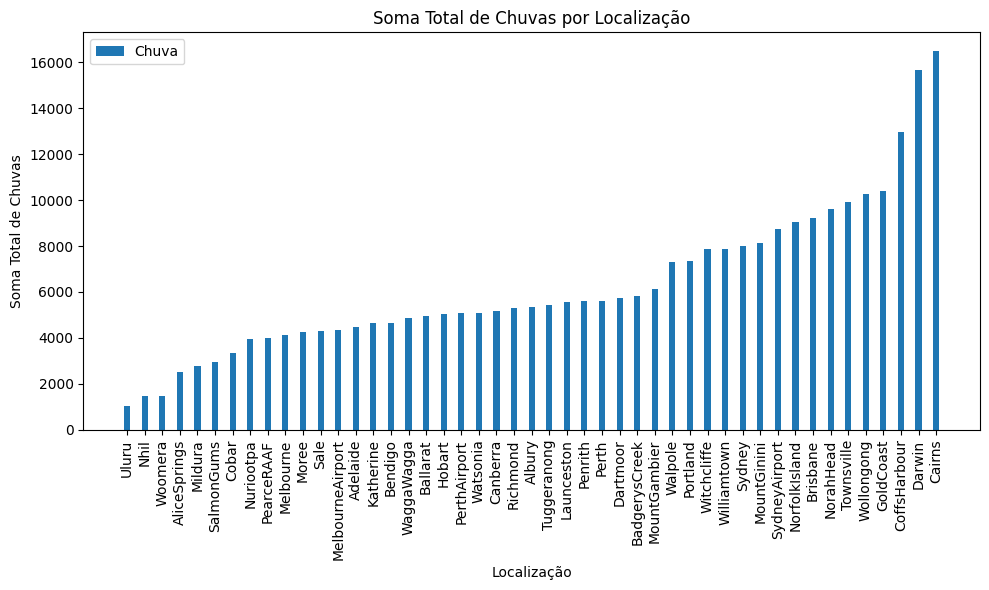

In [ ]:
# Gráfico de barras
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(soma_chuvas_por_localizacao_ordenada))

# Plota as barras
bars = plt.bar(index, soma_chuvas_por_localizacao_ordenada.values, bar_width, label='Chuva')

plt.title('Soma Total de Chuvas por Localização')
plt.xlabel('Localização')
plt.ylabel('Soma Total de Chuvas')

# Rotaciona os rótulos do eixo x para vertical
plt.xticks(index, soma_chuvas_por_localizacao_ordenada.index, rotation=90)

plt.legend()
plt.tight_layout()
plt.show()


**Comentário**: Entre 2007 e 2017, as cidades com a menor incidência de chuvas foram Urulu, Nhil e Woomera, todas apresentando um clima mais árido. Por outro lado, as cidades que experimentaram a maior quantidade de precipitação durante esse período foram Coffs Harbour, Darwin e Cairns, todas localizadas próximas ao litoral.

### Correlação entre variáveis numéricas

In [ ]:
# Seleciona colunas numéricas
colunas_numericas = ['TempMin', 'TempMax', 'Chuva', 'Evaporacao', 'LuzSol', 'VelocVentoMaisForte', 'VeloMediaVento9h', 'VeloMediaVento15h', 'Umidade9h', 'Umidade15h',
                     'Pressao9h', 'Pressao15h', 'Nuvem9h', 'Nuvem15h', 'Temp9h', 'Temp15h', 'ChoveHoje', 'ChoveAmanha']
df_numerico = df[colunas_numericas]
# Correlação
corr = df_numerico.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=2)

**Comentário**:
- Nenhuma variável implica fortemente para a ocorrência de chuva. O que mais se aproxima, porém não de maneira forte é a umidade, principalmente a das 15h que implica mais para a ocorrência de chuva amanhã.

- A temperatura mínima tem relação forte positiva com ambas as temperaturas (9h e 15h). Porém, ela é mais influênciada pela Temp9h. Já a  temperatura máxima também tem relação forte positiva com ambas as temperaturas (9h e 15h). Porém, ela é mais influênciada pela Temp15h. Alem disso, a temperatura mínina e máxima tem uma relação forte entre si.
- A chuva de hoje tem uma relação positiva com a chuva de amanhã, porém é muito fraca.
-  A velocidade do vento mais forte tem uma relação forte positiva com a velocidade média do vento às 15h.
- A umidade às 9h e 15h tem uma relação forte positiva entre si.
- A umidade às 15h tem uma relação negativa quase forte com a temperatura às 15h.

### Relação entre variáveis categóricas com a ocorrência de chuva hoje

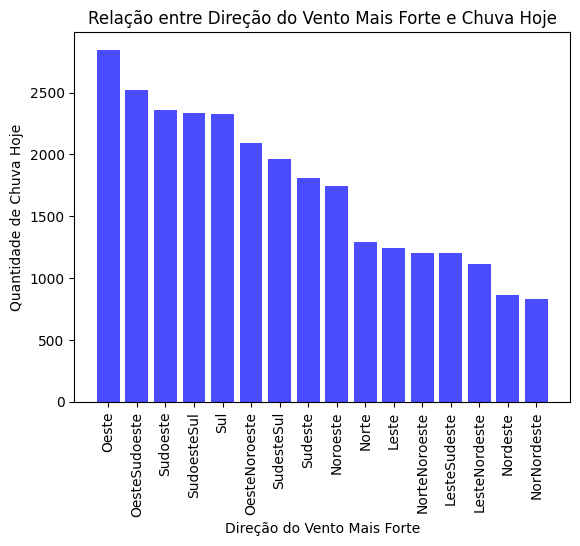

In [ ]:
chuvas = df[df['ChoveHoje'] == 1]

direcoes_vento = chuvas['DirRajVentoMaisForte'].value_counts().index
quantidades_chuva = chuvas['DirRajVentoMaisForte'].value_counts()

plt.bar(direcoes_vento, quantidades_chuva, color='blue', alpha=0.7)
plt.xlabel('Direção do Vento Mais Forte')
plt.ylabel('Quantidade de Chuva Hoje')
plt.title('Relação entre Direção do Vento Mais Forte e Chuva Hoje')
plt.xticks(rotation=90)
plt.show()

**Comentário**: Geralmente, nos dias chuvosos Oeste era a direção do vento mais forte mais recorrente e Nor-Nordeste era a menos recorrente.

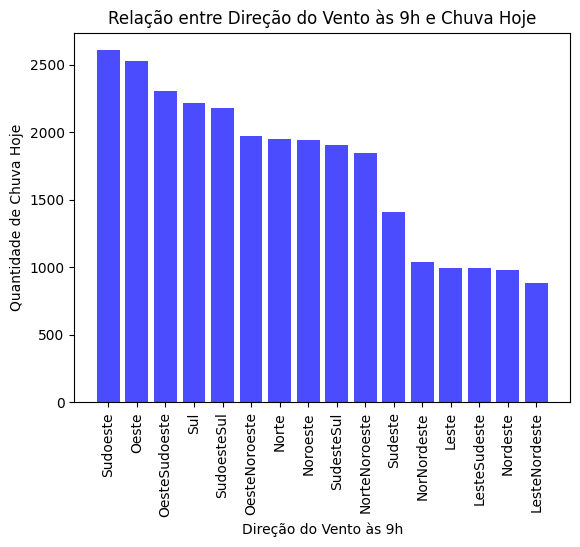

In [ ]:
chuvas = df[df['ChoveHoje'] == 1]

direcoes_vento = chuvas['DirVento9h'].value_counts().index
quantidades_chuva = chuvas['DirVento9h'].value_counts()

plt.bar(direcoes_vento, quantidades_chuva, color='blue', alpha=0.7)
plt.xlabel('Direção do Vento às 9h')
plt.ylabel('Quantidade de Chuva Hoje')
plt.title('Relação entre Direção do Vento às 9h e Chuva Hoje')
plt.xticks(rotation=90)
plt.show()

**Comentário**: Geralmente, nos dias chuvosos às 9h, Sudoeste e Oeste foram as direções do vento mais recorrentes e Leste-Nordeste era a menos recorrente.

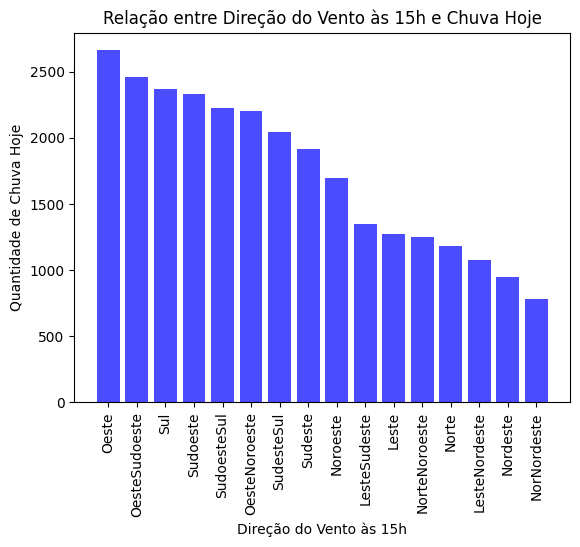

In [ ]:
chuvas = df[df['ChoveHoje'] == 1]

direcoes_vento = chuvas['DirVento15h'].value_counts().index
quantidades_chuva = chuvas['DirVento15h'].value_counts()

plt.bar(direcoes_vento, quantidades_chuva, color='blue', alpha=0.7)
plt.xlabel('Direção do Vento às 15h')
plt.ylabel('Quantidade de Chuva Hoje')
plt.title('Relação entre Direção do Vento às 15h e Chuva Hoje')
plt.xticks(rotation=90)
plt.show()

**Comentário**: Geralmente, nos dias chuvosos às 15h, Oeste foi a direção do vento mais recorrentes e Nor-Nordeste era a menos recorrente.

### Relação entre ChoveHoje e ChoveAmanha

In [ ]:
df[['ChoveHoje', 'ChoveAmanha']].apply(pd.Series.value_counts).unstack()

ChoveHoje    0    95954
             1    27756
ChoveAmanha  0    96318
             1    27392
dtype: int64

**Comentário**: Para a grande parte dos dias de chuva, no dia seguinte também choveu ao menos 1 milímetro.

### Relação  entre Localização e ocorrência chuva hoje

In [ ]:
px.histogram(df, x='Localizacao', color=df['ChoveHoje'], title="Localização vs Chove Hoje")

**Comentário**: Em todos as cidades, houve mais dias que não choveram do que dias que choveram, especialmemtem Urulu, Katherine e Nhill (menos chuvosas).

### Relação entre Localização e ocorrência de chuva amanhã

In [ ]:
px.histogram(df, x='Localizacao', color=df['ChoveAmanha'], title="Localização vs Chove Amanhã")

**Comentário**: Para ChoveAmanha, ocorre o mesmo que ChoveHoje.

# **4. Conclusões**
1. A grande parte dos dados não tem uma distribuição normal, devido aos dados serem reais e inconsistentes.
2. Observando o histórico de chuvas entre 2007 e 2017, houveram anos com baixa inscidência de chuva, bem como 2007 e 2008. Isso porque de acordo com buscas em sites de notícias, nesse período houve seca na Austrália, o que justifica a baixa incidência de chuvas. Já nos anos 2010, 2011 e 2016 houvem enchentes/inudações, justificando a alta incidência de chuvas.
3. Entre 2007 e 2017, as cidades com a menor incidência de chuvas foram Urulu, Nhil e Woomera, todas apresentando um clima mais árido. Por outro lado, as cidades que experimentaram a maior quantidade de precipitação durante esse período foram Coffs Harbour, Darwin e Cairns, todas localizadas próximas ao litoral.
4. Nenhuma variável implica fortemente para a ocorrência de chuva. O que mais se aproxima, porém não de maneira forte é a umidade, principalmente a das 15h que implica mais para a ocorrência de chuva amanhã.
5. A chuva de hoje tem uma relação positiva com a chuva de amanhã, porém é muito fraca. O que significa que nem sempre que chove hoje, vai chover amanhã.
6. Geralmente, nos dias chuvosos Oeste era a direção do vento mais forte e mais recorrente.
7.  Para a grande parte dos dias que houve incidência de chuva, no dia seguinte também choveu pelo menos 1 milímetro.
8. Em todos as cidades, houve mais dias que não choveram do que dias que choveram, especialmemtem Urulu, Katherine e Nhill (menos chuvosas).


## **Pŕoximos passos**

Utilizar um modelo de Machine Learning para prever quantos milímetros irá chover no dia seguinte.